In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import os

In [2]:
unitsTab=pd.read_csv('codes/units.csv')
unitsTab.index = unitsTab['Unit Code']
unitsDict=unitsTab.to_dict()["Units"]

In [3]:
paramsTab=pd.read_csv('codes/parameters.csv')
paramsTab.index = paramsTab['Parameter Code']
paramsDict = paramsTab.to_dict()['Parameter']

In [4]:
def loadData(path):
    df=pd.read_csv(file, delimiter='|')

    # drop all 'Qualifier' columns
    bad_columns = [c for c in df.columns if c.startswith('Qualifier')]
    bad_columns += ['Null Data Code', 'Sampling Frequency', 'Monitor Protocol (MP) ID', 'Alternate Method Detectable Limit']
    df.drop(bad_columns, axis=1, inplace=True)

    # grab only rows which begin with 'RD'
    df = df[df['# RD'] == 'RD']
    df.dropna(subset=['Date'], inplace=True)

    # calculate datetimes and sort based on them
    df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Start Time'])
    df.index = df.datetime
    df.sort_index(inplace=True)

    # replace unit and parameter codes with readable data
    df.Unit = df.Unit.astype(int)
    df.Parameter = df.Parameter.astype(int)
    df.replace({'Unit':unitsDict, 'Parameter':paramsDict}, inplace=True)

    return df

In [5]:
basePath='raw_data/'
files=[f for f in os.listdir(basePath) if f.endswith('.txt')]
file=basePath+files[0]
print(files)

['Harrisburg_Lancaster_York_MSA_CO_2014-2016.txt', 'Harrisburg_Lancaster_York_MSA_PM10_2014-2016.txt', 'Harrisburg_Lancaster_York_MSA_PM25SiteLevel_2014-2016.txt', 'Harrisburg_Lancaster_York_MSA_SO2_2014-2016.txt', 'Harrisburg_Met_2014.txt', 'Harrisburg_Met_2015.txt', 'Harrisburg_Met_2016.txt', 'Hershey_Met_2014.txt', 'Hershey_Met_2015.txt', 'Hershey_Met_2016.txt', 'Lancaster_Met_2014.txt', 'Lancaster_Met_2015.txt', 'Lancaster_Met_2016.txt', 'PerryCounty_Met_2014.txt', 'York_Met_2014.txt', 'York_Met_2015.txt', 'York_Met_2016.txt']


In [16]:
df1=loadData(file)
df1.head(2)

,# RD,Action Code,State Code,County Code,Site ID,Parameter,POC,Sample Duration,Unit,Method,Date,Start Time,Sample Value,Uncertainty,datetime
datetime,,,,,,,,,,,,,,,
2014-01-01 00:00:00,RD,I,42,133,0008,Carbon monoxide,1,1,Parts per million,093,20140101,00:00,0.1,NaN,2014-01-01 00:00:00
2014-01-01 01:00:00,RD,I,42,133,0008,Carbon monoxide,1,1,Parts per million,093,20140101,01:00,0.1,NaN,2014-01-01 01:00:00


In [20]:
df1["# RD"].describe()

count     26304
unique        1
top          RD
freq      26304
Name: # RD, dtype: object

In [10]:
print(df.parameter.unique())

AttributeError: 'DataFrame' object has no attribute 'parameter'

In [9]:
# for f in files:
#     df = loadData(basePath+f)
#     print(f, '\t', df.index.min(), df.index.max(), df.parameter.unique(), df.unit.unique())

In [10]:
filesFrame=pd.DataFrame(files, columns=['filename'])
filesFrame

,filename
0,AQDM_2141990090 (1).txt
1,AQDM_2141990090.txt
2,AQDM_2142091599.txt
3,AQDM_2142175470 (1).txt
4,AQDM_2142175470 (2).txt
5,AQDM_2142175470 (3).txt
6,AQDM_2142175470 (4).txt
7,AQDM_2142175470.txt
8,AQDM_2142402333 (1).txt
9,AQDM_2142402333.txt


In [11]:
filesFrame['table'] = [loadData(basePath+f) for f in filesFrame.filename]

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
filesFrame

,filename,table
0,AQDM_2141990090 (1).txt,site data_status...
1,AQDM_2141990090.txt,site data_status...
2,AQDM_2142091599.txt,site data_status...
3,AQDM_2142175470 (1).txt,site data_status...
4,AQDM_2142175470 (2).txt,site data_status...
5,AQDM_2142175470 (3).txt,site data_status...
6,AQDM_2142175470 (4).txt,site data_status...
7,AQDM_2142175470.txt,site data_status...
8,AQDM_2142402333 (1).txt,site data_status...
9,AQDM_2142402333.txt,site data_status...


In [13]:
allData=pd.concat(list(filesFrame.table))
allData.sort_index(inplace=True)
allData.drop_duplicates(['datetime','value','parameter','unit'], inplace=True)
allData.tail(10)

,site,data_status,action_code,datetime,parameter,duration,frequency,value,unit,qc,...,lon,GISDatum,elev,method_code,mpc,mpc_value,uncertainty,qualifiers,unitCode,parameterCode
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 04:00:00,840481410044,0.0,10.0,2017-01-01 04:00:00,Wind Speed - Scalar,60.0,0.0,5.500,Knots,0.0,...,-106.455227,WGS84,1122.0,50.0,1.0,0.600,NaN,NaN,13.0,61101.0
2017-01-01 04:00:00,840481410044,0.0,10.0,2017-01-01 04:00:00,PM2.5 - Local Conditions,60.0,0.0,3.900,Micrograms/cubic meter (LC),0.0,...,-106.455227,WGS84,1122.0,170.0,1.0,5.000,NaN,NaN,105.0,88101.0
2017-01-01 04:00:00,840482010416,0.0,10.0,2017-01-01 04:00:00,Outdoor Temperature,60.0,0.0,66.000,Degrees Fahrenheit,0.0,...,-95.294722,WGS84,10.0,40.0,1.0,-60.000,NaN,NaN,15.0,62101.0
2017-01-01 05:00:00,840481130069,0.0,10.0,2017-01-01 05:00:00,Carbon monoxide,60.0,0.0,0.229,Parts per million,0.0,...,-96.860117,WGS84,127.0,593.0,1.0,0.020,NaN,NaN,7.0,42101.0
2017-01-01 05:00:00,840482010416,0.0,10.0,2017-01-01 05:00:00,Outdoor Temperature,60.0,0.0,66.000,Degrees Fahrenheit,0.0,...,-95.294722,WGS84,10.0,40.0,1.0,-60.000,NaN,NaN,15.0,62101.0
2017-01-01 05:00:00,840481410044,0.0,10.0,2017-01-01 05:00:00,Wind Speed - Scalar,60.0,0.0,6.400,Knots,0.0,...,-106.455227,WGS84,1122.0,50.0,1.0,0.600,NaN,NaN,13.0,61101.0
2017-01-01 05:00:00,840482010416,0.0,10.0,2017-01-01 05:00:00,Ozone,60.0,0.0,0.014,Parts per million,0.0,...,-95.294722,WGS84,10.0,47.0,1.0,0.005,NaN,NaN,7.0,44201.0
2017-01-01 05:00:00,840481410044,0.0,10.0,2017-01-01 05:00:00,PM2.5 - Local Conditions,60.0,0.0,18.900,Micrograms/cubic meter (LC),0.0,...,-106.455227,WGS84,1122.0,170.0,1.0,5.000,NaN,NaN,105.0,88101.0
2017-01-01 06:00:00,840481410044,0.0,10.0,2017-01-01 06:00:00,Wind Speed - Scalar,60.0,0.0,7.000,Knots,0.0,...,-106.455227,WGS84,1122.0,50.0,1.0,0.600,NaN,NaN,13.0,61101.0


In [15]:
print(allData.parameter.unique())
[CO, O3, PM2, WS, Temp]=allData.parameter.unique()

['Carbon monoxide' 'Ozone' 'Wind Speed - Scalar' 'PM2.5 - Local Conditions'
 'Outdoor Temperature']


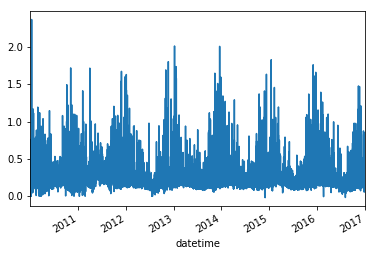

In [19]:
allData[allData.parameter==CO].value.plot()
# allData[allData.parameter==O3].value.plot()

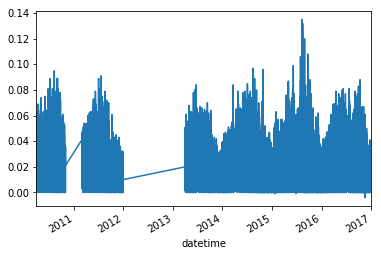

In [20]:
allData[allData.parameter==O3].value.plot()

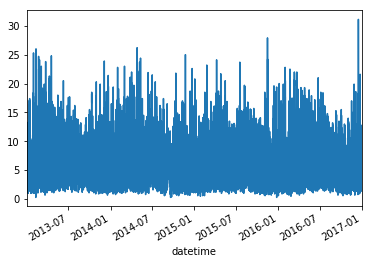

In [21]:
allData[allData.parameter==PM2].value.plot()

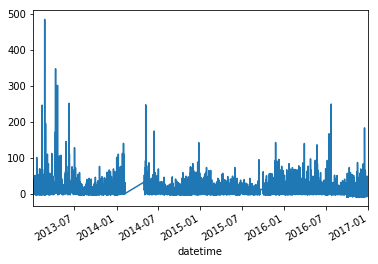

In [22]:
allData[allData.parameter==WS].value.plot()

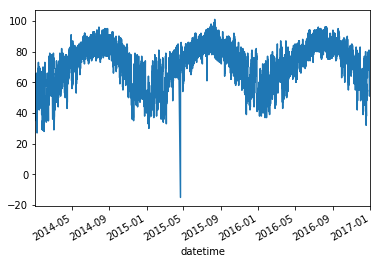

In [23]:
allData[allData.parameter==Temp].value.plot()